In [306]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [307]:
#Reading the dataset
ApplData=pd.read_csv("application_data.csv")
PrevApplData=pd.read_csv("previous_application.csv")

In [308]:
#Application data rows and columns
ApplData.shape

(307511, 122)

In [309]:
#Check application data header
ApplData.head()
#no change for header

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [310]:
#Previous application data rows and columns
PrevApplData.shape

(1670214, 37)

In [311]:
#Check previsous application data header
PrevApplData.head()
#no change for header

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

## Data Cleaning

In [312]:
#Application data info 
ApplData.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [313]:
pd.set_option("display.max_rows" , None)
#check null values in application dataset
ApplData.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [314]:
# % missing values in application dataset
(ApplData.isnull().sum() * 100)/307511

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [315]:
#Columns having more than 40% of null data
((ApplData.isnull().sum() * 100)/307511 ) >=40

SK_ID_CURR                      False
TARGET                          False
NAME_CONTRACT_TYPE              False
CODE_GENDER                     False
FLAG_OWN_CAR                    False
FLAG_OWN_REALTY                 False
CNT_CHILDREN                    False
AMT_INCOME_TOTAL                False
AMT_CREDIT                      False
AMT_ANNUITY                     False
AMT_GOODS_PRICE                 False
NAME_TYPE_SUITE                 False
NAME_INCOME_TYPE                False
NAME_EDUCATION_TYPE             False
NAME_FAMILY_STATUS              False
NAME_HOUSING_TYPE               False
REGION_POPULATION_RELATIVE      False
DAYS_BIRTH                      False
DAYS_EMPLOYED                   False
DAYS_REGISTRATION               False
DAYS_ID_PUBLISH                 False
OWN_CAR_AGE                      True
FLAG_MOBIL                      False
FLAG_EMP_PHONE                  False
FLAG_WORK_PHONE                 False
FLAG_CONT_MOBILE                False
FLAG_PHONE  

In [316]:
#Saving null columns in dataframe and checking above 40% columns
ApplNull=((ApplData.isnull().sum() * 100)/307511 )
ApplNull[ApplNull.values>40]

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [317]:
#dropping the columsn having missing values more than 40% as most of them are related to additional inofmration on living sitiation of customer

ApplData.drop(["OWN_CAR_AGE","EXT_SOURCE_1","APARTMENTS_AVG","BASEMENTAREA_AVG","YEARS_BEGINEXPLUATATION_AVG","YEARS_BUILD_AVG","COMMONAREA_AVG","ELEVATORS_AVG",
"ENTRANCES_AVG","FLOORSMAX_AVG","FLOORSMIN_AVG","LANDAREA_AVG","LIVINGAPARTMENTS_AVG","LIVINGAREA_AVG","NONLIVINGAPARTMENTS_AVG","NONLIVINGAREA_AVG",
"APARTMENTS_MODE","BASEMENTAREA_MODE","YEARS_BEGINEXPLUATATION_MODE","YEARS_BUILD_MODE","COMMONAREA_MODE","ELEVATORS_MODE","ENTRANCES_MODE",
"FLOORSMAX_MODE","FLOORSMIN_MODE","LANDAREA_MODE","LIVINGAPARTMENTS_MODE","LIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE","NONLIVINGAREA_MODE",
"APARTMENTS_MEDI","BASEMENTAREA_MEDI","YEARS_BEGINEXPLUATATION_MEDI","YEARS_BUILD_MEDI","COMMONAREA_MEDI","ELEVATORS_MEDI","ENTRANCES_MEDI",
"FLOORSMAX_MEDI","FLOORSMIN_MEDI","LANDAREA_MEDI","LIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI","NONLIVINGAPARTMENTS_MEDI","NONLIVINGAREA_MEDI",
"FONDKAPREMONT_MODE","HOUSETYPE_MODE","TOTALAREA_MODE","WALLSMATERIAL_MODE","EMERGENCYSTATE_MODE"], axis=1, inplace=True)

In [318]:
ApplData.shape

(307511, 73)

In [319]:
#Inspecting highest missing values in remaining dataset
(ApplData.isnull().sum() * 100)/307511

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [320]:
Prev_null=(PrevApplData.isnull().sum() * 100)/1670214

In [321]:
Prev_null[Prev_null >40]

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [322]:
PrevApplData.drop(["AMT_DOWN_PAYMENT", "RATE_DOWN_PAYMENT",  "NAME_TYPE_SUITE", "DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE", "DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"], axis=1, inplace=True)

In [323]:
PrevApplData.shape

(1670214, 28)

In [324]:
Prev_null=(PrevApplData.isnull().sum() * 100)/1670214

In [325]:
Prev_null[Prev_null >0]

AMT_ANNUITY                 22.286665
AMT_CREDIT                   0.000060
AMT_GOODS_PRICE             23.081773
RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
CNT_PAYMENT                 22.286366
PRODUCT_COMBINATION          0.020716
dtype: float64

## Handling missing values

In [326]:
#Analyzing Ocuupation type column
ApplData.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [327]:
#Cannot drop column imputing with unknown for further anlysis
ApplData.OCCUPATION_TYPE.fillna('Unknown',inplace=True)

In [328]:
ApplData.OCCUPATION_TYPE.value_counts(normalize=True)

Unknown                  0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

In [329]:
#inspecting EXT_SOURCE_3 column further
ApplData.EXT_SOURCE_3.value_counts(normalize=True)
ApplData.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [330]:
#Mean and median for ApplData.EXT_SOURCE_3 are not having much difference replacing missing values with median
ApplData.EXT_SOURCE_3.fillna(ApplData.EXT_SOURCE_3.median(), inplace=True)
ApplData.EXT_SOURCE_2.fillna(ApplData.EXT_SOURCE_2.median(), inplace=True)                    

In [331]:
ApplData.EXT_SOURCE_3.isnull().sum()

0

In [332]:
ApplData["AMT_REQ_CREDIT_BUREAU_HOUR"].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [333]:
ApplData["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [334]:
#filling missing values with most frequent value as mean and median are having huge difference and using it will deviate data destribution
ApplData["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(ApplData["AMT_REQ_CREDIT_BUREAU_HOUR"].mode()[0], inplace=True)

In [335]:
ApplData["AMT_REQ_CREDIT_BUREAU_DAY"].describe()
ApplData["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts()
ApplData["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(ApplData["AMT_REQ_CREDIT_BUREAU_DAY"].mode()[0], inplace=True)

In [336]:
ApplData["AMT_REQ_CREDIT_BUREAU_WEEK"].describe()
ApplData["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts()
ApplData["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(ApplData["AMT_REQ_CREDIT_BUREAU_WEEK"].mode()[0], inplace=True)

In [337]:
ApplData["AMT_REQ_CREDIT_BUREAU_MON"].fillna(ApplData["AMT_REQ_CREDIT_BUREAU_MON"].mode()[0], inplace=True)
ApplData["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(ApplData["AMT_REQ_CREDIT_BUREAU_QRT"].mode()[0], inplace=True)
ApplData["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(ApplData["AMT_REQ_CREDIT_BUREAU_YEAR"].mode()[0], inplace=True)

In [338]:
ApplData.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [339]:
ApplData.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [340]:
#Mean and median has huge difference cant use it . Imputing with mode
ApplData.OBS_30_CNT_SOCIAL_CIRCLE.fillna(ApplData.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0], inplace=True)
ApplData.DEF_30_CNT_SOCIAL_CIRCLE.fillna(ApplData.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0], inplace=True)
ApplData.OBS_60_CNT_SOCIAL_CIRCLE.fillna(ApplData.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0], inplace=True)
ApplData.DEF_60_CNT_SOCIAL_CIRCLE.fillna(ApplData.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0], inplace=True)

In [341]:
ApplData.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [342]:
#Imputing name type suite with most frequent value
ApplData.NAME_TYPE_SUITE.fillna(ApplData.NAME_TYPE_SUITE.mode()[0], inplace=True)

In [343]:
ApplData.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        0.0                         0.0  
4                        0.0                         0.0  

[5 rows x 73 columns]

In [344]:
(PrevApplData.isnull().sum() * 100)/1670214

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDU

In [345]:
PrevApplData.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:>

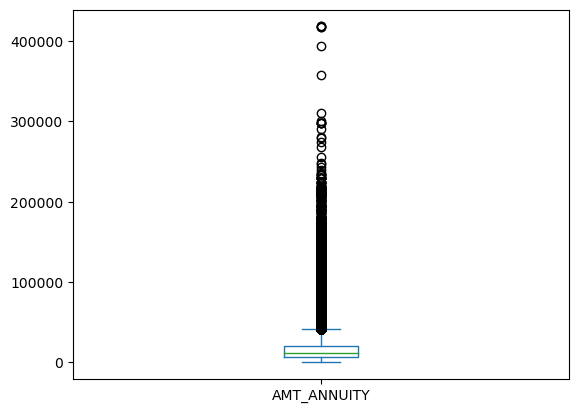

In [346]:
PrevApplData.AMT_ANNUITY.plot.box()

In [347]:
PrevApplData.AMT_ANNUITY.isnull().sum()

372235

In [348]:
#Imputing amy annuity with median as its is having outliers
PrevApplData.AMT_ANNUITY.fillna(PrevApplData.AMT_ANNUITY.median(), inplace=True)

In [349]:
PrevApplData.AMT_ANNUITY.isnull().sum()

0

In [350]:
PrevApplData.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

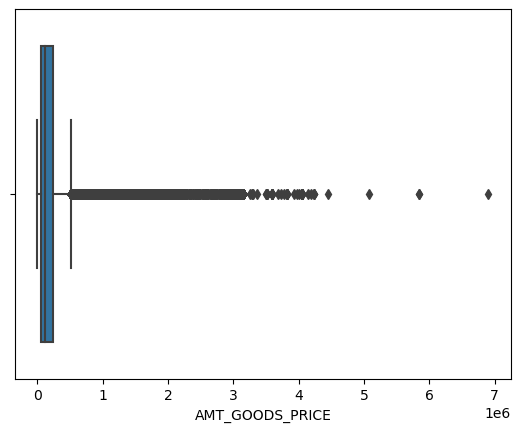

In [351]:
sns.boxplot(PrevApplData.AMT_GOODS_PRICE)
plt.show()

In [352]:
PrevApplData.AMT_GOODS_PRICE.isnull().sum()

385515

In [353]:
#Imputing amt goods price with median as its is having outliers
PrevApplData.AMT_GOODS_PRICE.fillna(PrevApplData.AMT_GOODS_PRICE.median(), inplace=True)

In [354]:
PrevApplData.AMT_GOODS_PRICE.value_counts()

112320.000     385545
45000.000       47831
225000.000      43549
135000.000      40666
450000.000      38926
90000.000       29367
180000.000      24736
270000.000      20567
675000.000      20235
67500.000       16857
900000.000      15572
112500.000      14373
315000.000      11920
229500.000      10756
337500.000      10537
360000.000      10286
157500.000      10220
1350000.000      8434
202500.000       7937
247500.000       7161
454500.000       7039
1129500.000      6928
0.000            6869
540000.000       6842
1125000.000      6390
405000.000       5872
765000.000       5124
585000.000       4770
292500.000       3787
495000.000       3749
810000.000       3487
630000.000       2872
720000.000       2757
31455.000        2569
22455.000        2545
1800000.000      2531
382500.000       2481
44955.000        2350
26955.000        2333
472500.000       2301
184500.000       2225
62955.000        2224
35955.000        2219
1354500.000      2159
679500.000       2130
2250000.00

In [355]:
PrevApplData.CNT_PAYMENT.isnull().sum()

372230

In [356]:
PrevApplData.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

<AxesSubplot:>

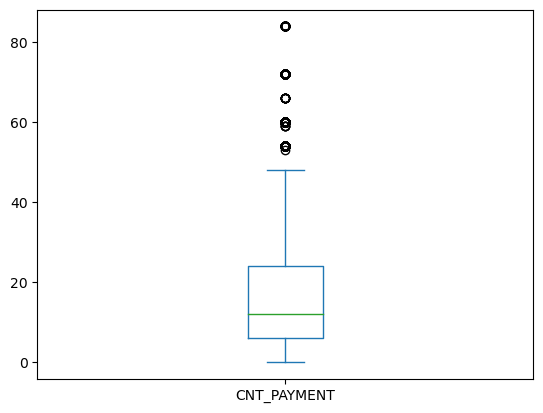

In [357]:
PrevApplData.CNT_PAYMENT.plot.box()

In [358]:
#Imputing cnt payment with median as its is having outliers
PrevApplData.CNT_PAYMENT.fillna(PrevApplData.CNT_PAYMENT.median(), inplace=True)

In [359]:
PrevApplData.CNT_PAYMENT.isnull().sum()

0

# Data correction and checking outliers

In [360]:
ApplData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [361]:
ApplData.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [362]:
ApplData.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [363]:
#super low count for XNA imputing it to F
ApplData.CODE_GENDER.replace('XNA','F', inplace=True)

In [364]:
ApplData.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [365]:
ApplData.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [366]:
ApplData.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [367]:
ApplData.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               307511.000000              307511.000000   
mean                     0.005538                   0.006055   
std                      0.078014                   0.103037   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               307511.000000              307511.000000   
mean                     0.029723                   0.231293   
std                      0.190728                   0.856810   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              307511.000000               307511.000000  
mean                    0.229631                    1.643447  
std                     0.744059                    1.855821  
min                     0.000000                    0.000000  
25%              

In [368]:
ApplData['AMT_INCOME_TOTAL'].describe()
ApplData['AMT_INCOME_TOTAL']=ApplData['AMT_INCOME_TOTAL']/1000

In [369]:
ApplData['AMT_GOODS_PRICE'].describe()
ApplData['AMT_GOODS_PRICE']=ApplData['AMT_GOODS_PRICE']/1000

In [370]:
ApplData['AMT_ANNUITY'].describe()
ApplData['AMT_ANNUITY']=ApplData['AMT_ANNUITY']/1000

In [371]:
ApplData.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [372]:
#COnverting to absolute value as negative values dont make sense
ApplData.DAYS_BIRTH=abs(ApplData.DAYS_BIRTH)

In [373]:
ApplData.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [374]:
#Converting age to years
ApplData['Age']=ApplData.DAYS_BIRTH / 365

In [375]:
ApplData.DAYS_EMPLOYED=abs(ApplData.DAYS_EMPLOYED)
ApplData.DAYS_REGISTRATION=abs(ApplData.DAYS_REGISTRATION)
ApplData.DAYS_ID_PUBLISH=abs(ApplData.DAYS_ID_PUBLISH)

In [376]:
#Deriving employment years
ApplData['Employment_years']=abs(ApplData.DAYS_EMPLOYED)/365
ApplData.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [377]:
ApplData['DAYS_BIRTH'].max()

25229

In [378]:
#1000 years is not human employment age. 365243 is the days value given for these customers, Assuming they worked for 243 days a year
ApplData[ApplData.DAYS_EMPLOYED == 365243].groupby(['NAME_EDUCATION_TYPE'])['DAYS_EMPLOYED'].count()

NAME_EDUCATION_TYPE
Academic degree                     26
Higher education                  8194
Incomplete higher                  520
Lower secondary                   1529
Secondary / secondary special    45105
Name: DAYS_EMPLOYED, dtype: int64

In [379]:
## For Secondary / secondary special assuming 18 years taken(6570 days)
## Lower secondary 14 years (5110days)
## Higher Education/Academic Degree 21 years (7665 days)
## Incomplete Higher 19 years (6935 days)
ApplData['DAYS_EMPLOYED']=np.where((ApplData.DAYS_EMPLOYED == 365243) & (ApplData.NAME_EDUCATION_TYPE == 'Secondary / secondary special'),(ApplData.DAYS_BIRTH - 6570), ApplData.DAYS_EMPLOYED)
ApplData['DAYS_EMPLOYED']=np.where((ApplData.DAYS_EMPLOYED == 365243) & (ApplData.NAME_EDUCATION_TYPE == 'Academic degree'),(ApplData.DAYS_BIRTH - 7665), ApplData.DAYS_EMPLOYED)
ApplData['DAYS_EMPLOYED']=np.where((ApplData.DAYS_EMPLOYED == 365243) & (ApplData.NAME_EDUCATION_TYPE == 'Higher education'),(ApplData.DAYS_BIRTH - 7665), ApplData.DAYS_EMPLOYED)
ApplData['DAYS_EMPLOYED']=np.where((ApplData.DAYS_EMPLOYED == 365243) & (ApplData.NAME_EDUCATION_TYPE == 'Incomplete higher'),(ApplData.DAYS_BIRTH - 6935), ApplData.DAYS_EMPLOYED)
ApplData['DAYS_EMPLOYED']=np.where((ApplData.DAYS_EMPLOYED == 365243) & (ApplData.NAME_EDUCATION_TYPE == 'Lower secondary'),(ApplData.DAYS_BIRTH - 5110), ApplData.DAYS_EMPLOYED)

In [380]:
ApplData[ApplData.DAYS_EMPLOYED == 365243].groupby(['NAME_EDUCATION_TYPE'])['DAYS_EMPLOYED'].count()

Series([], Name: DAYS_EMPLOYED, dtype: int64)

In [381]:
#Coverting employment also to years
ApplData['Employment_years']=ApplData.DAYS_EMPLOYED/365
ApplData['Employment_years'].value_counts()

0.547945     156
0.613699     152
0.630137     151
0.545205     151
0.580822     150
0.627397     143
1.052055     143
0.632877     140
0.567123     138
0.589041     138
0.515068     137
0.591781     137
0.536986     136
0.317808     136
0.608219     135
0.528767     134
0.534247     133
0.586301     132
0.695890     131
0.583562     131
0.550685     130
1.043836     130
0.506849     128
0.638356     128
0.649315     127
0.531507     127
0.504110     126
0.641096     126
0.953425     125
0.572603     125
0.660274     124
2.041096     123
0.375342     123
1.046575     122
0.380822     122
0.542466     122
0.652055     122
0.657534     120
0.523288     120
0.597260     120
0.561644     120
0.610959     119
0.616438     119
0.323288     119
0.668493     118
0.495890     118
1.178082     118
0.621918     118
0.624658     117
0.734247     117
1.013699     117
0.361644     117
0.364384     117
0.315068     117
0.353425     116
0.558904     116
0.326027     116
0.564384     115
0.298630     1

In [382]:
ApplData.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [383]:
#Creating category on ORGANIZATION_TYPE for XNA values
ApplData.ORGANIZATION_TYPE.replace('XNA','Unknown', inplace=True)

In [384]:
ApplData.DAYS_LAST_PHONE_CHANGE.value_counts()

#changing negative days for phone change column
ApplData.DAYS_LAST_PHONE_CHANGE=abs(ApplData.DAYS_LAST_PHONE_CHANGE)

In [385]:
ApplData.FLAG_DOCUMENT_3.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_5.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_6.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_7.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_8.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_9.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_10.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_11.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_12.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_13.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_14.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_15.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_16.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_17.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_18.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_19.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_20.value_counts(normalize=True)
ApplData.FLAG_DOCUMENT_21.value_counts(normalize=True)

0    0.999665
1    0.000335
Name: FLAG_DOCUMENT_21, dtype: float64

In [386]:
# 99% of flag docs whre not provided  for below docs, removing these columns as wont be able to draw any conclusion 
ApplData.drop(["FLAG_DOCUMENT_2","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"], axis=1, inplace=True)

In [387]:
ApplData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [388]:
ApplData.AMT_REQ_CREDIT_BUREAU_HOUR.describe()
ApplData.AMT_REQ_CREDIT_BUREAU_DAY.describe()
ApplData.AMT_REQ_CREDIT_BUREAU_WEEK.describe()
ApplData.AMT_REQ_CREDIT_BUREAU_MON.describe()
ApplData.AMT_REQ_CREDIT_BUREAU_QRT.describe()
ApplData.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

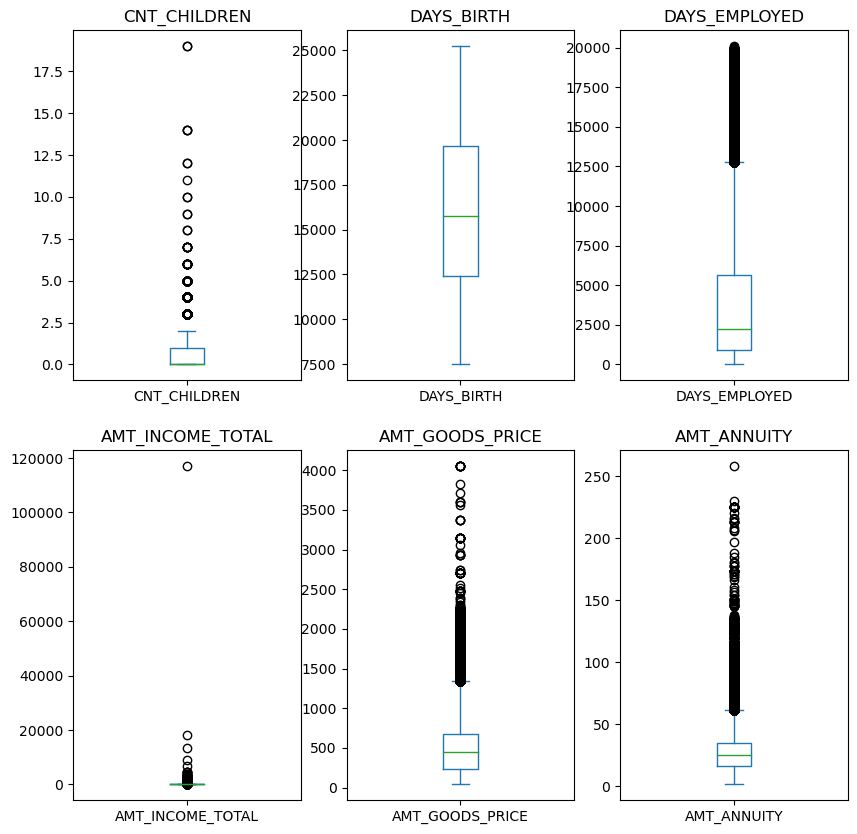

In [389]:
plt.figure(figsize=[10,10])
plt.subplot(231)
ApplData.CNT_CHILDREN.plot.box()
plt.title('CNT_CHILDREN')
plt.subplot(232)
ApplData.DAYS_BIRTH.plot.box()
plt.title('DAYS_BIRTH')
plt.subplot(233)
ApplData.DAYS_EMPLOYED.plot.box()
plt.title('DAYS_EMPLOYED')
plt.subplot(234)
ApplData.AMT_INCOME_TOTAL.plot.box()
plt.title('AMT_INCOME_TOTAL')
plt.subplot(235)
ApplData.AMT_GOODS_PRICE.plot.box()
plt.title('AMT_GOODS_PRICE')
plt.subplot(236)
ApplData.AMT_ANNUITY.plot.box()
plt.title('AMT_ANNUITY')
plt.show()

# Days birth have no outliers

# Data Imbalance analysis for target variable 

In [390]:
ApplData.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [391]:
91.927/8.0729

11.38710996048508

<AxesSubplot:ylabel='TARGET'>

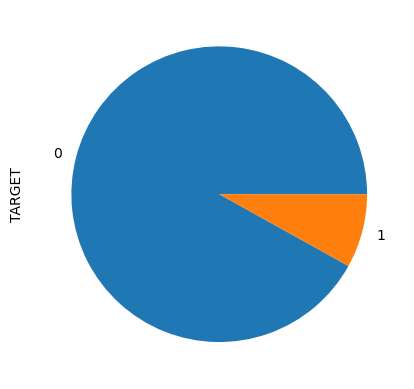

In [392]:
ApplData.TARGET.value_counts().plot.pie()

# Imbalance ratio is  1:11.38

In [393]:
#plt.pie(ApplData.TARGET)
defaulter=int(ApplData.TARGET.value_counts(normalize=True)[1] *100)
OnTime=int(ApplData.TARGET.value_counts(normalize=True)[0] *100)

In [394]:
ApplData['Target_cat']=ApplData["TARGET"].replace({1:"Defaulter",0:"OnTimePayer"})

In [395]:
l=[defaulter,OnTime]
labels=['Defaulter','OnTimePayer']

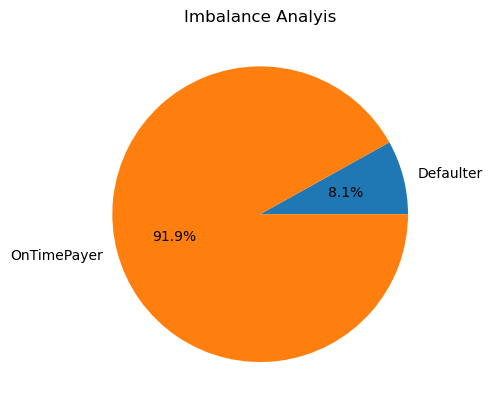

In [396]:
plt.pie(l, labels=labels,autopct='%1.1f%%')
plt.title('Imbalance Analyis')
plt.show()

In [397]:
Repayer=ApplData[ApplData["TARGET"]==0]
Defaulter=ApplData[ApplData["TARGET"]==1]

In [398]:
#ApplData.groupby(['CODE_GENDER', 'TARGET'])['TARGET'].value_counts()
gender=ApplData.groupby(['CODE_GENDER'])['TARGET'].value_counts()
Per_gender=gender.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_gender

CODE_GENDER  TARGET
F            0         93.00081
             1          6.99919
M            0         89.85808
             1         10.14192
Name: TARGET, dtype: float64

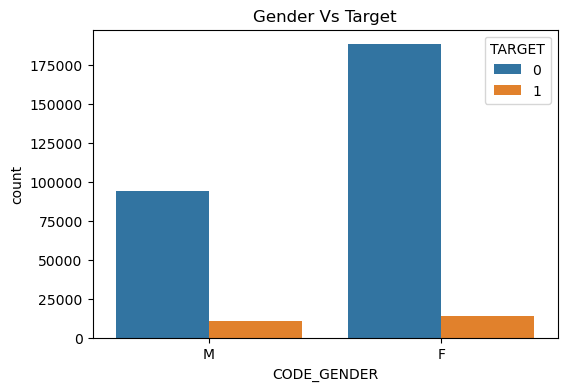

In [399]:
plt.figure(figsize=[6,4])
sns.countplot(data=ApplData, x='CODE_GENDER', hue='TARGET')
plt.title('Gender Vs Target')
plt.show()

# Gender analysis
Femlales are most applicants than males but males have high default rate to on time payment ratio

In [400]:
#converting adding age group and employemnt years group
ApplData['Age_group']=pd.cut(ApplData.Age,[0,30,40,50,60,999],['<30','30-40','40-50','50-60','60+'])
ApplData['Employement_group']=pd.cut(ApplData.Employment_years,[0,5,10,20,30,40,999],['<5','5-10','10-20','20-30','30-40','40+'])
ApplData['Income_group']=pd.cut(ApplData.AMT_INCOME_TOTAL,[0,50,100,150,200,250,300,400,9999],['<50k','50k-100k','100k-150k','150k-200k','200k-250k','250k-300k','300k-400k','400k+'])
ApplData['Credit_group']=pd.cut(ApplData.AMT_CREDIT,[0,100,200,300,400,500,600,700,800,9999],['<100','100-200','200-300','300-400','400-500','500-600','600-700','700-800','800+'])
ApplData['GoodPrice_group']=pd.cut(ApplData.AMT_GOODS_PRICE,[0,50,100,150,200,250,300,400,9999],['<50k','50k-100k','100k-150k','150k-200k','200k-250k','250k-300k','300k-400k','400k+'])
ApplData['Annuity_group']=pd.cut(ApplData.AMT_ANNUITY,[0,10,20,30,40,50,60,70,80,90,100,9999],['<10k','10k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80','80k-90k','90k-100k','100k+'])

In [401]:
ApplData['Age_group'].value_counts(normalize=True)

(30, 40]     0.267659
(40, 50]     0.248905
(50, 60]     0.221332
(0, 30]      0.146405
(60, 999]    0.115700
Name: Age_group, dtype: float64

In [402]:
AgeGrp=ApplData.groupby(['Age_group'])['TARGET'].value_counts()
Per_AgeGrp=AgeGrp.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_AgeGrp

Age_group  TARGET
(0, 30]    0         88.543124
           1         11.456876
(30, 40]   0         90.416484
           1          9.583516
(40, 50]   0         92.349198
           1          7.650802
(50, 60]   0         93.870295
           1          6.129705
(60, 999]  0         95.078558
           1          4.921442
Name: TARGET, dtype: float64

# Age group analysis
    50+% loan applicaters are aged between 30-50 
    60+ aged have least default rate and safest to provide loan 
    Below 30 years applicators has most default rate

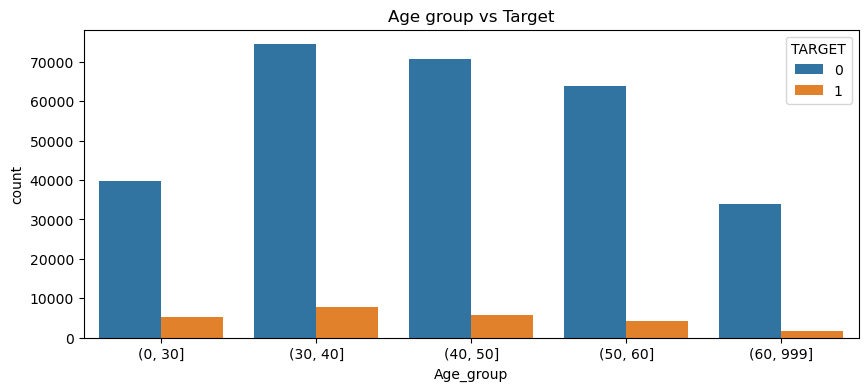

In [403]:
plt.figure(figsize=[10,4])
sns.countplot(data=ApplData, x='Age_group', hue='TARGET')
plt.title('Age group vs Target')
plt.show()

In [404]:
ApplData.Employement_group.value_counts(normalize=True)

(0, 5]       0.443330
(5, 10]      0.211226
(10, 20]     0.126156
(40, 999]    0.118748
(30, 40]     0.064284
(20, 30]     0.036256
Name: Employement_group, dtype: float64

In [405]:
EmpGrp=ApplData.groupby(['Employement_group'])['TARGET'].value_counts()
Per_EmpGrp=EmpGrp.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_EmpGrp

Employement_group  TARGET
(0, 5]             0         89.428437
                   1         10.571563
(5, 10]            0         92.624011
                   1          7.375989
(10, 20]           0         94.408929
                   1          5.591071
(20, 30]           0         94.950220
                   1          5.049780
(30, 40]           0         94.830028
                   1          5.169972
(40, 999]          0         94.887173
                   1          5.112827
Name: TARGET, dtype: float64

# Employment years analysis 
    Least employment years customers have highest default to repayers ratio. 
    AS employment years increases there is slight decrease in default rate and slight increase in repayers rate from 10 
    years onwards

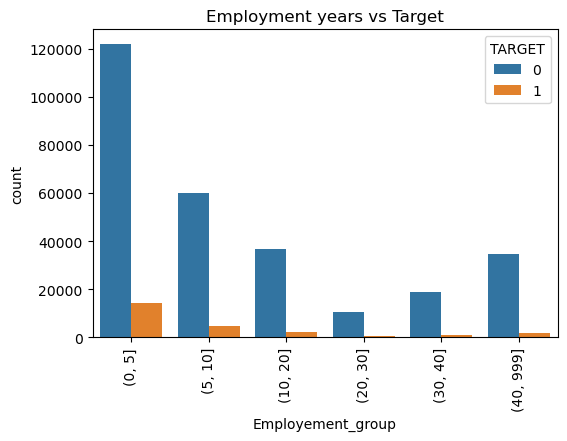

In [406]:
plt.figure(figsize=[6,4])
sns.countplot(data=ApplData, x='Employement_group', hue='TARGET')
plt.xticks(rotation=90)
plt.title('Employment years vs Target')
plt.show()

In [407]:
ApplData.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

In [408]:
edu=ApplData.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts()
Per_edu=edu.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_edu

NAME_EDUCATION_TYPE            TARGET
Academic degree                0         98.170732
                               1          1.829268
Higher education               0         94.644885
                               1          5.355115
Incomplete higher              0         91.515034
                               1          8.484966
Lower secondary                0         89.072327
                               1         10.927673
Secondary / secondary special  0         91.060071
                               1          8.939929
Name: TARGET, dtype: float64

# Education analysis.
    90+% customers minimum have secondary education. 
    Customers with academic degrees have high repayer % and hence can be provided with loan
    Lower secondary has high default rate with ~11%


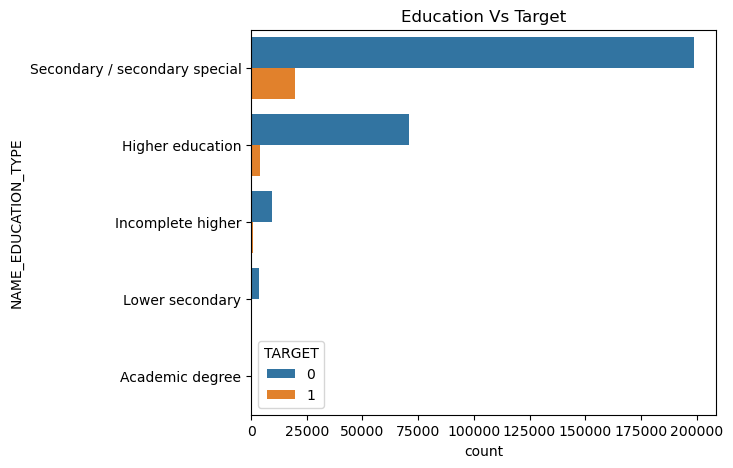

In [409]:
plt.figure(figsize=[6,5])
sns.countplot(data=ApplData, y='NAME_EDUCATION_TYPE', hue='TARGET')
plt.title('Education Vs Target')
plt.show()


In [410]:
ApplData.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

In [411]:
incomegroup=ApplData.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts()
Per_incomegroup=incomegroup.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_incomegroup

NAME_INCOME_TYPE      TARGET
Businessman           0         100.000000
Commercial associate  0          92.515743
                      1           7.484257
Maternity leave       0          60.000000
                      1          40.000000
Pensioner             0          94.613634
                      1           5.386366
State servant         0          94.245035
                      1           5.754965
Student               0         100.000000
Unemployed            0          63.636364
                      1          36.363636
Working               0          90.411528
                      1           9.588472
Name: TARGET, dtype: float64

# Income type analysis
    More than half customers are working
    Maternity leave and unemployed have highest default rate should be provided with probably high interest loan.Businessman have 100% repayer % and hence safest category to provide loan.

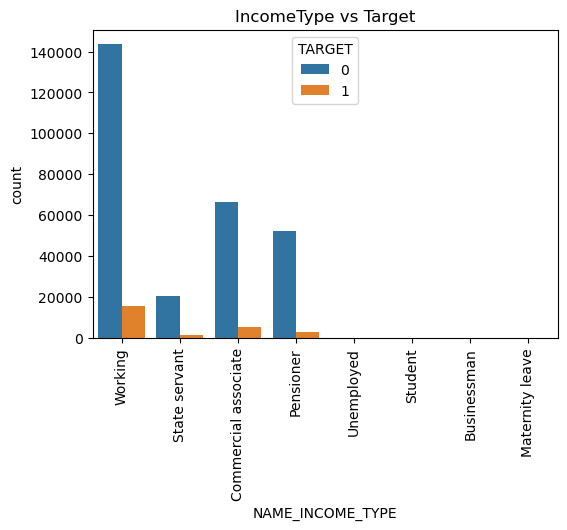

In [412]:
plt.figure(figsize=[6,4])
sns.countplot(data=ApplData ,x='NAME_INCOME_TYPE',hue='TARGET')
plt.title('IncomeType vs Target')
plt.xticks(rotation = 90)
plt.show()

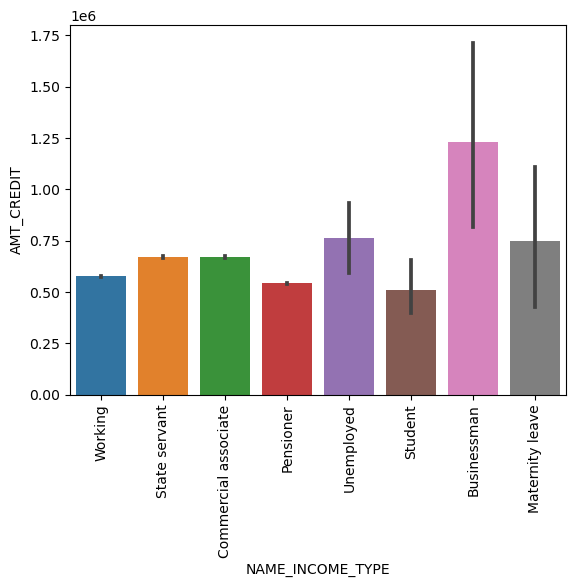

In [413]:
plt.figure()
sns.barplot(ApplData.NAME_INCOME_TYPE,ApplData.AMT_CREDIT )
plt.xticks(rotation = 90)
plt.show()

In [414]:
ApplData.groupby(['ORGANIZATION_TYPE'])['TARGET'].value_counts()

ORGANIZATION_TYPE       TARGET
Advertising             0           394
                        1            35
Agriculture             0          2197
                        1           257
Bank                    0          2377
                        1           130
Business Entity Type 1  0          5497
                        1           487
Business Entity Type 2  0          9653
                        1           900
Business Entity Type 3  0         61669
                        1          6323
Cleaning                0           231
                        1            29
Construction            0          5936
                        1           785
Culture                 0           358
                        1            21
Electricity             0           887
                        1            63
Emergency               0           520
                        1            40
Government              0          9678
                        1           726
Hotel    

In [415]:
Orgtype=ApplData.groupby(['ORGANIZATION_TYPE'])['TARGET'].value_counts()
Per_Orgtype=Orgtype.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_Orgtype

ORGANIZATION_TYPE       TARGET
Advertising             0         91.841492
                        1          8.158508
Agriculture             0         89.527302
                        1         10.472698
Bank                    0         94.814519
                        1          5.185481
Business Entity Type 1  0         91.861631
                        1          8.138369
Business Entity Type 2  0         91.471619
                        1          8.528381
Business Entity Type 3  0         90.700377
                        1          9.299623
Cleaning                0         88.846154
                        1         11.153846
Construction            0         88.320190
                        1         11.679810
Culture                 0         94.459103
                        1          5.540897
Electricity             0         93.368421
                        1          6.631579
Emergency               0         92.857143
                        1          7.142857
G

# Organization type analysis
       Business Entity type 3 have highest loan applications
       Cleaners, construction, industry type 1, Restaurant,Transport: type 3, Trade: type 3, self_employed,Industry: type 8, Industry: type 13 have high defaulter rate.
       Transport type 1, Trade type 4 , security ministers are safe category with low default rate


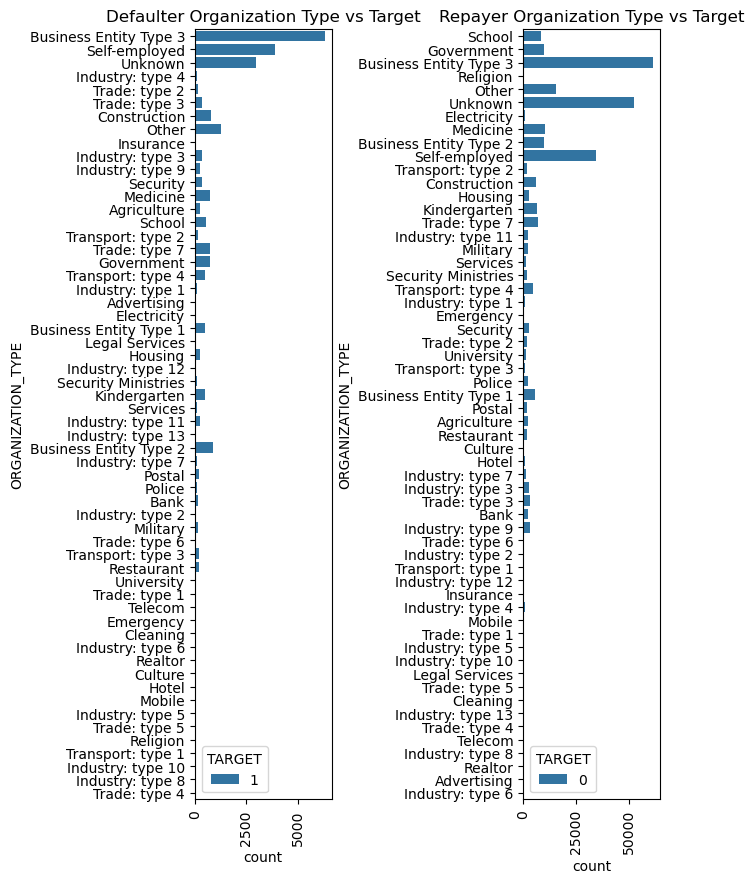

In [416]:
plt.figure(figsize=[6,10])
plt.subplot(131)
sns.countplot(data=Defaulter ,y='ORGANIZATION_TYPE',hue='TARGET')
plt.title('Defaulter Organization Type vs Target')
plt.xticks(rotation = 90)
plt.subplot(133)
sns.countplot(data=Repayer ,y='ORGANIZATION_TYPE',hue='TARGET')
plt.title('Repayer Organization Type vs Target')
plt.xticks(rotation = 90)
plt.show()

In [417]:
Occtype=ApplData.groupby(['OCCUPATION_TYPE'])['TARGET'].value_counts()
Per_Occtype=Occtype.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_Occtype

OCCUPATION_TYPE        TARGET
Accountants            0         95.169673
                       1          4.830327
Cleaning staff         0         90.393295
                       1          9.606705
Cooking staff          0         89.556004
                       1         10.443996
Core staff             0         93.696046
                       1          6.303954
Drivers                0         88.673870
                       1         11.326130
HR staff               0         93.605684
                       1          6.394316
High skill tech staff  0         93.840070
                       1          6.159930
IT staff               0         93.536122
                       1          6.463878
Laborers               0         89.421230
                       1         10.578770
Low-skill Laborers     0         82.847587
                       1         17.152413
Managers               0         93.785972
                       1          6.214028
Medicine staff         0

# Occupation analysis
    Low skilled labors are having 17% default rate
    Waiters/barman staff, Security staff, cooking staff, Drivers, Labours are also having 10+% default rate
    Accountants are safest category to provide loan

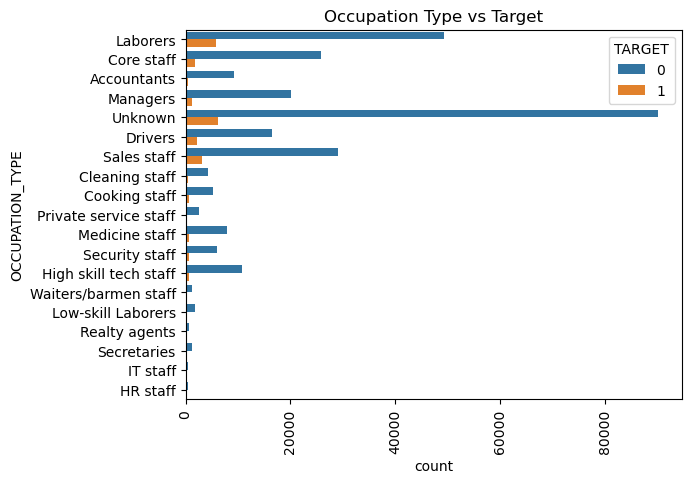

In [418]:
sns.countplot(data=ApplData ,y='OCCUPATION_TYPE',hue='TARGET')
plt.title('Occupation Type vs Target')
plt.xticks(rotation = 90)
plt.show()

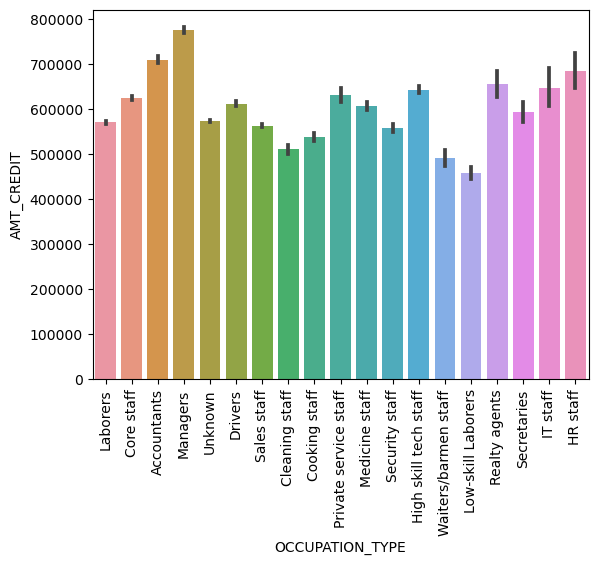

In [419]:
plt.figure()
sns.barplot(ApplData.OCCUPATION_TYPE,ApplData.AMT_CREDIT )
plt.xticks(rotation = 90)
plt.show()

In [420]:
ApplData.groupby(['NAME_FAMILY_STATUS','TARGET'])['TARGET'].count()

NAME_FAMILY_STATUS    TARGET
Civil marriage        0          26814
                      1           2961
Married               0         181582
                      1          14850
Separated             0          18150
                      1           1620
Single / not married  0          40987
                      1           4457
Unknown               0              2
Widow                 0          15151
                      1            937
Name: TARGET, dtype: int64

In [421]:
famstatus=ApplData.groupby(['NAME_FAMILY_STATUS'])['TARGET'].value_counts()
Per_famstatus=famstatus.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_famstatus

NAME_FAMILY_STATUS    TARGET
Civil marriage        0          90.055416
                      1           9.944584
Married               0          92.440132
                      1           7.559868
Separated             0          91.805766
                      1           8.194234
Single / not married  0          90.192325
                      1           9.807675
Unknown               0         100.000000
Widow                 0          94.175783
                      1           5.824217
Name: TARGET, dtype: float64

# Family Status anlysis
    Married customers occupying highest chunk of loan applicationts
    Civil married do have high default rate than other categories. 
    Widowers have least default rate and safest to provide loan
    The customers who havnt provided status have 100% repayers rate need to look into them more

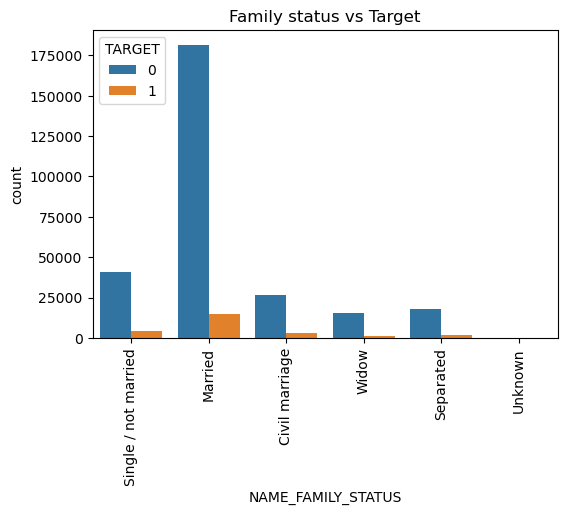

In [422]:
plt.figure(figsize=[6,4])
sns.countplot(data=ApplData,x='NAME_FAMILY_STATUS',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Family status vs Target')
plt.show()

In [423]:
car=ApplData.groupby(['FLAG_OWN_CAR'])['TARGET'].value_counts()
Per_car=car.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_car

FLAG_OWN_CAR  TARGET
N             0         91.499773
              1          8.500227
Y             0         92.756270
              1          7.243730
Name: TARGET, dtype: float64

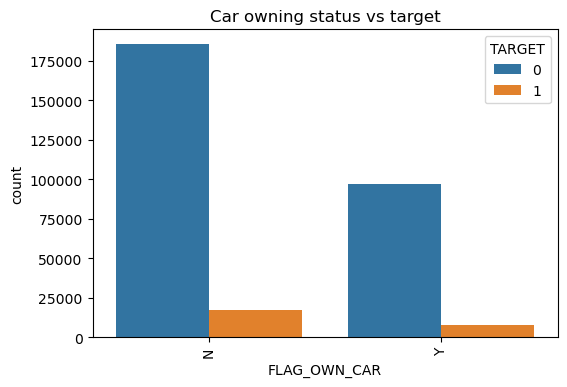

In [424]:
plt.figure(figsize=[6,4])
sns.countplot(data=ApplData,x='FLAG_OWN_CAR',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Car owning status vs target')
plt.show()

In [425]:
real=ApplData.groupby(['FLAG_OWN_REALTY'])['TARGET'].value_counts()
Per_real=real.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_real

FLAG_OWN_REALTY  TARGET
N                0         91.675071
                 1          8.324929
Y                0         92.038423
                 1          7.961577
Name: TARGET, dtype: float64

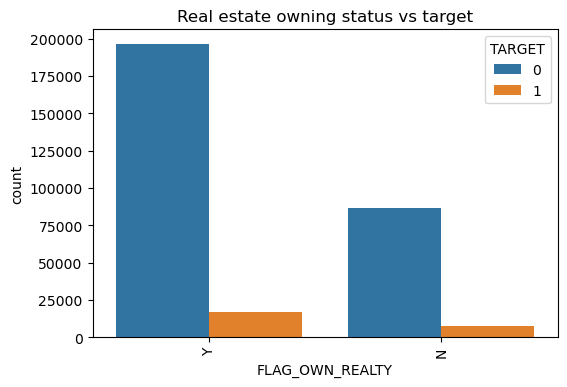

In [426]:
plt.figure(figsize=[6,4])
sns.countplot(data=ApplData,x='FLAG_OWN_REALTY',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Real estate owning status vs target')
plt.show()

# Car and Real estate owning analysis
    Default rate in owning it and not owning it does not have much differenec. Cannot draw conclusions on these columns

In [427]:
ApplData.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

In [428]:
name_house=ApplData.groupby(['NAME_HOUSING_TYPE'])['TARGET'].value_counts()
Per_name_house=name_house.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_name_house

NAME_HOUSING_TYPE    TARGET
Co-op apartment      0         92.067736
                     1          7.932264
House / apartment    0         92.204289
                     1          7.795711
Municipal apartment  0         91.460252
                     1          8.539748
Office apartment     0         93.427589
                     1          6.572411
Rented apartment     0         87.686949
                     1         12.313051
With parents         0         88.301887
                     1         11.698113
Name: TARGET, dtype: float64

# Housing type anlysis
    Rented apartment and living with parent customers have high default rate (10+%)
    Office apartment customers have least default rate 6.57

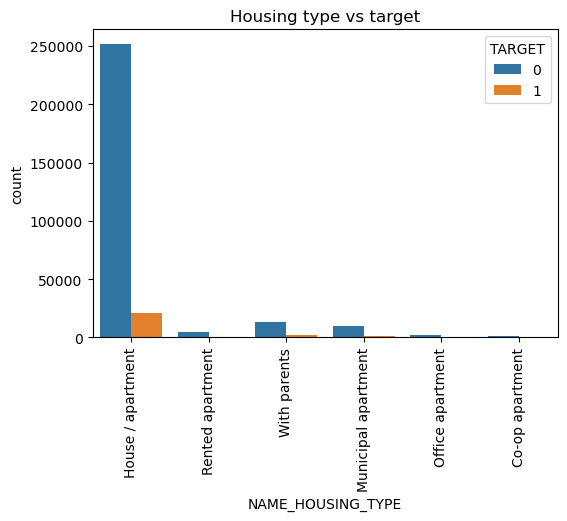

In [429]:
plt.figure(figsize=[6,4])
sns.countplot(data=ApplData,x='NAME_HOUSING_TYPE',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Housing type vs target')
plt.show()

In [430]:
ApplData.Income_group.value_counts()

(100, 150]     91591
(150, 200]     64307
(50, 100]      59181
(200, 250]     48137
(250, 300]     17039
(300, 400]     14676
(400, 9999]     8060
(0, 50]         4517
Name: Income_group, dtype: int64

In [431]:
incomegrp=ApplData.groupby(['Income_group'])['TARGET'].value_counts()
Per_incomegrp=incomegrp.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_incomegrp

Income_group  TARGET
(0, 50]       0         92.406464
              1          7.593536
(50, 100]     0         91.750731
              1          8.249269
(100, 150]    0         91.381249
              1          8.618751
(150, 200]    0         91.553019
              1          8.446981
(200, 250]    0         92.255438
              1          7.744562
(250, 300]    0         92.998415
              1          7.001585
(300, 400]    0         93.969747
              1          6.030253
(400, 9999]   0         94.205955
              1          5.794045
Name: TARGET, dtype: float64

# Income analysis
    Below 50k have hig default rate
    Above 200k as income increases there is slight decrease in default rate

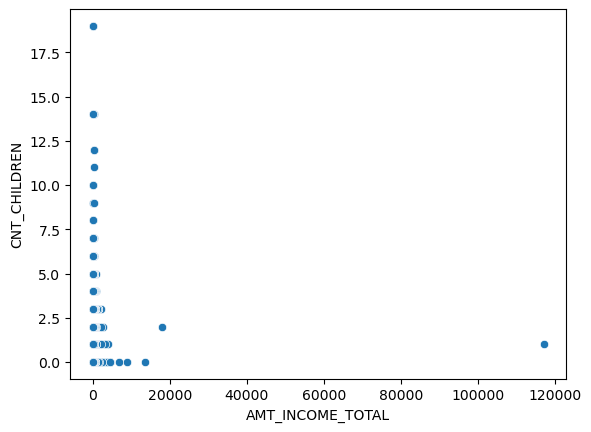

In [432]:
sns.scatterplot(ApplData.AMT_INCOME_TOTAL,ApplData.CNT_CHILDREN)
plt.show()

In [433]:
cntchildren=ApplData.groupby(['CNT_CHILDREN'])['TARGET'].value_counts()
Per_cntchildren=cntchildren.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_cntchildren

CNT_CHILDREN  TARGET
0             0          92.288191
              1           7.711809
1             0          91.076425
              1           8.923575
2             0          91.278179
              1           8.721821
3             0          90.368577
              1           9.631423
4             0          87.179487
              1          12.820513
5             0          91.666667
              1           8.333333
6             0          71.428571
              1          28.571429
7             0         100.000000
8             0         100.000000
9             1         100.000000
10            0         100.000000
11            1         100.000000
12            0         100.000000
14            0         100.000000
19            0         100.000000
Name: TARGET, dtype: float64

# Number of children analysis
    Customers with 6 children have high default rate
    Customers with more than 6 children are with either 100% default rate or on time payment.
    below seven more children customers have high default %

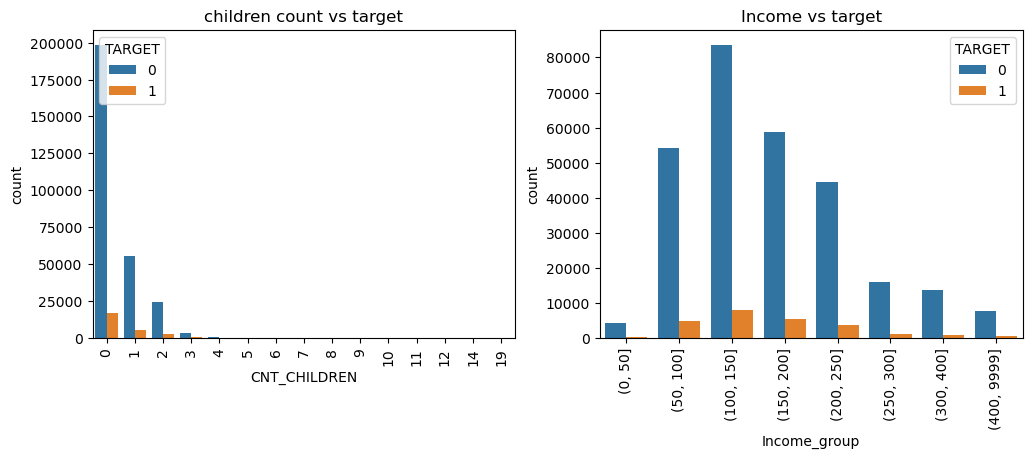

In [434]:
plt.figure(figsize=[12,4])
plt.subplot(121)
sns.countplot(data=ApplData,x='CNT_CHILDREN',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('children count vs target')
plt.subplot(122)
sns.countplot(data=ApplData,x='Income_group',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Income vs target')
plt.show()

In [435]:
Anngrp=ApplData.groupby(['Annuity_group'])['TARGET'].value_counts()
Per_Anngrp=Anngrp.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_Anngrp

Annuity_group  TARGET
(0, 10]        0         92.913284
               1          7.086716
(10, 20]       0         92.268871
               1          7.731129
(20, 30]       0         91.069150
               1          8.930850
(30, 40]       0         91.033435
               1          8.966565
(40, 50]       0         92.992431
               1          7.007569
(50, 60]       0         93.254842
               1          6.745158
(60, 70]       0         95.703821
               1          4.296179
(70, 80]       0         95.314506
               1          4.685494
(80, 90]       0         96.375618
               1          3.624382
(90, 100]      0         96.836983
               1          3.163017
(100, 9999]    0         98.019802
               1          1.980198
Name: TARGET, dtype: float64

In [436]:
goodpricegrp=ApplData.groupby(['GoodPrice_group'])['TARGET'].value_counts()
Per_goodpricegrp=goodpricegrp.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_goodpricegrp

GoodPrice_group  TARGET
(0, 50]          0         95.553881
                 1          4.446119
(50, 100]        0         93.673801
                 1          6.326199
(100, 150]       0         93.100853
                 1          6.899147
(150, 200]       0         91.570656
                 1          8.429344
(200, 250]       0         91.518993
                 1          8.481007
(250, 300]       0         91.722549
                 1          8.277451
(300, 400]       0         89.490551
                 1         10.509449
(400, 9999]      0         92.163028
                 1          7.836972
Name: TARGET, dtype: float64

# Good Price and Annuity analysis
    Above 100k annuity customers least likely to default and hence safest to provide loan to them
    Below 50k good amount customers have leats default %

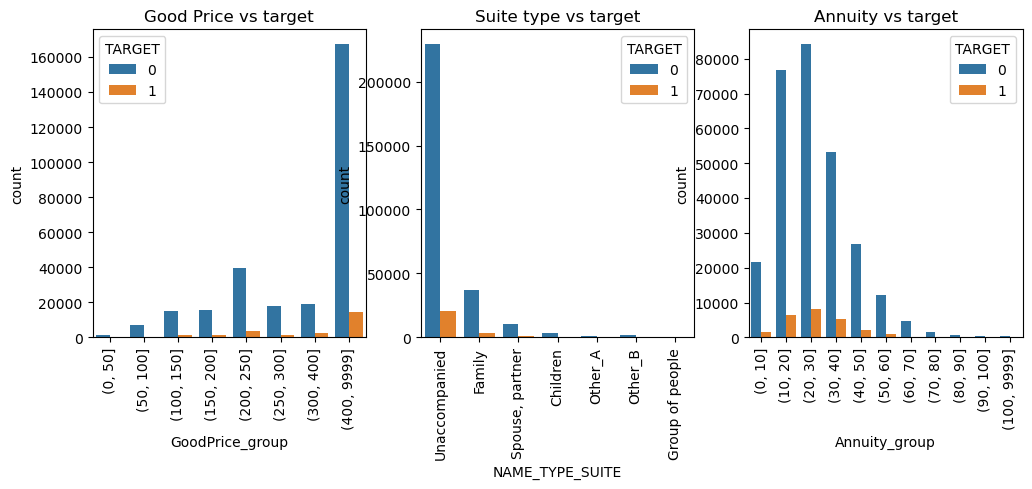

In [437]:
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.countplot(data=ApplData,x='GoodPrice_group',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Good Price vs target')
plt.subplot(132)
sns.countplot(data=ApplData,x='NAME_TYPE_SUITE',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Suite type vs target')
plt.subplot(133)
sns.countplot(data=ApplData,x='Annuity_group',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Annuity vs target')
plt.show()

<Figure size 640x480 with 0 Axes>

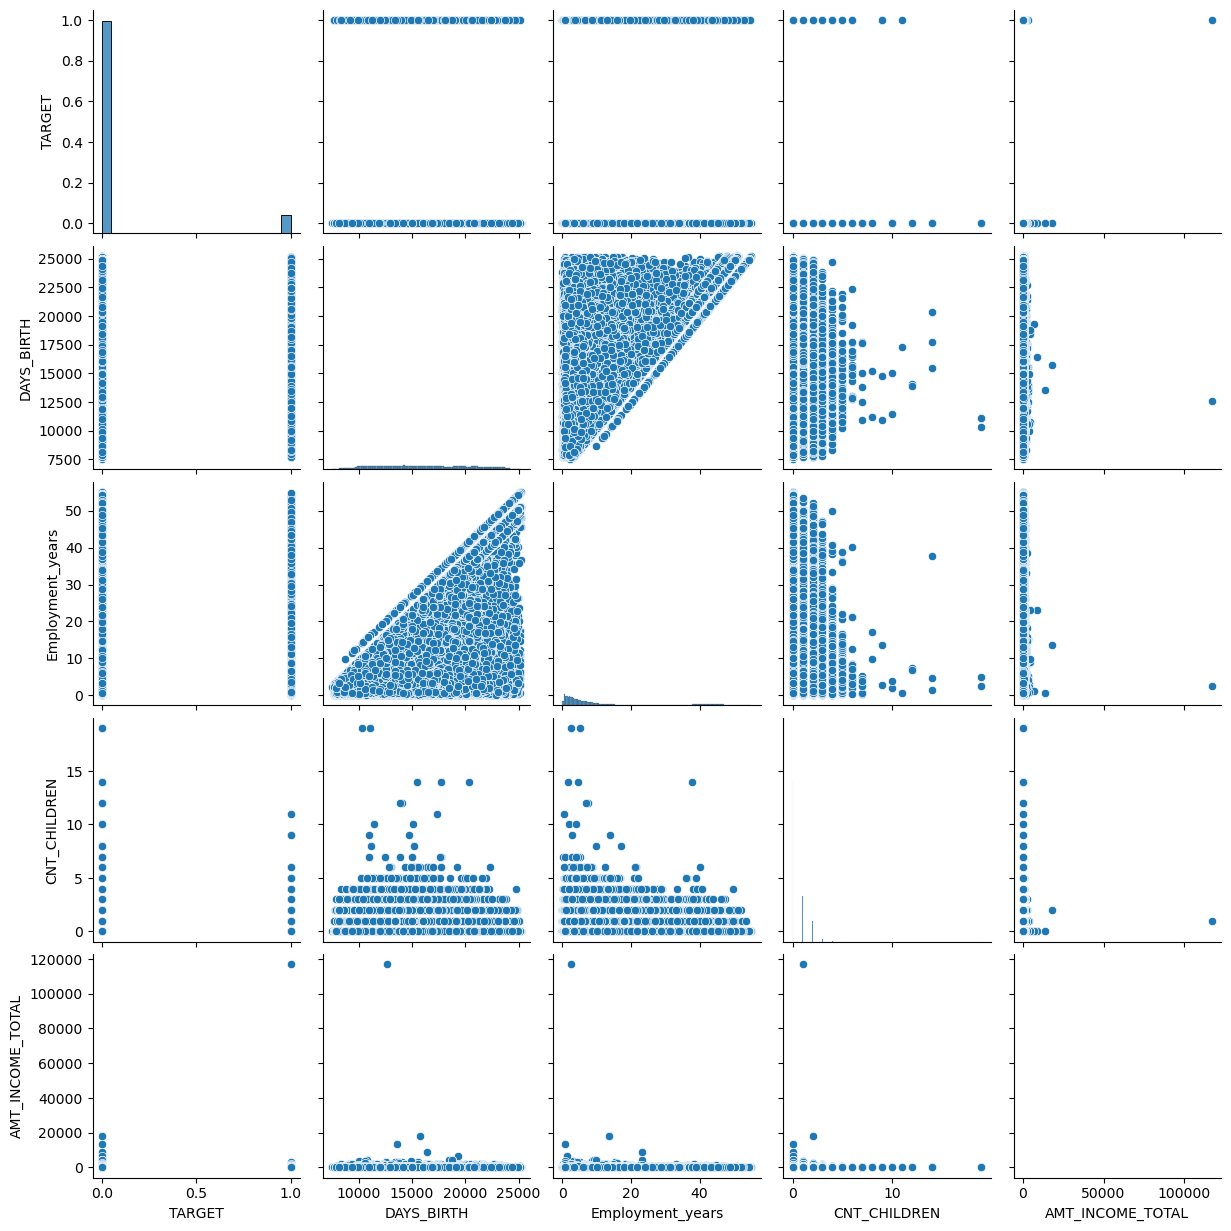

In [438]:
plt.figure()
sns.pairplot(ApplData[['TARGET','DAYS_BIRTH','Employment_years','CNT_CHILDREN','AMT_INCOME_TOTAL']])
plt.show()

In [439]:
cntfam=ApplData.groupby(['CNT_FAM_MEMBERS'])['TARGET'].value_counts()
Per_cntfam=cntfam.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_cntfam

CNT_FAM_MEMBERS  TARGET
1.0              0          91.635592
                 1           8.364408
2.0              0          92.416502
                 1           7.583498
3.0              0          91.239710
                 1           8.760290
4.0              0          91.351176
                 1           8.648824
5.0              0          90.598045
                 1           9.401955
6.0              0          86.519608
                 1          13.480392
7.0              0          92.592593
                 1           7.407407
8.0              0          70.000000
                 1          30.000000
9.0              0         100.000000
10.0             0          66.666667
                 1          33.333333
11.0             1         100.000000
12.0             0         100.000000
13.0             1         100.000000
14.0             0         100.000000
15.0             0         100.000000
16.0             0         100.000000
20.0             0        

# Number of family members analysis
    number of family members increase show some incream in default % but on members count higher than 10 doesnt follow this trend

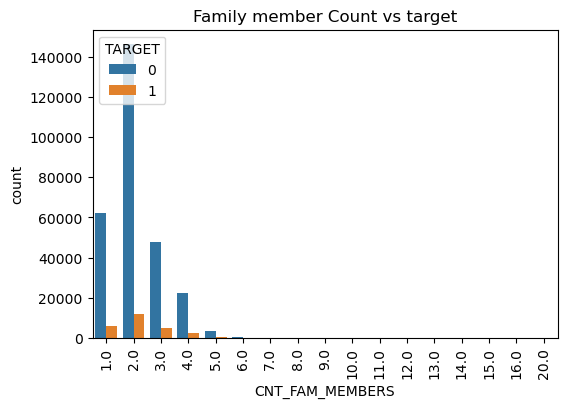

In [440]:
plt.figure(figsize=[6,4])
sns.countplot(data=ApplData,x='CNT_FAM_MEMBERS',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Family member Count vs target')
plt.show()

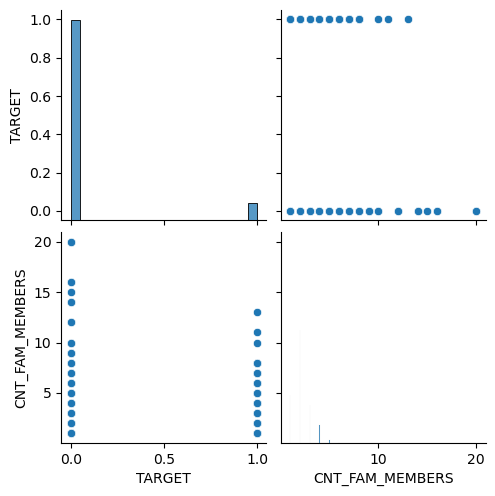

In [441]:
sns.pairplot(ApplData[['TARGET','CNT_FAM_MEMBERS']])
plt.show()

In [442]:
regrate=ApplData.groupby(['REGION_RATING_CLIENT'])['TARGET'].value_counts()
Per_regrate=regrate.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_regrate

REGION_RATING_CLIENT  TARGET
1                     0         95.179675
                      1          4.820325
2                     0         92.110898
                      1          7.889102
3                     0         88.897165
                      1         11.102835
Name: TARGET, dtype: float64

In [443]:
regratect=ApplData.groupby(['REGION_RATING_CLIENT_W_CITY'])['TARGET'].value_counts()
Per_regratect=regratect.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_regratect

REGION_RATING_CLIENT_W_CITY  TARGET
1                            0         95.159072
                             1          4.840928
2                            0         92.082237
                             1          7.917763
3                            0         88.597811
                             1         11.402189
Name: TARGET, dtype: float64

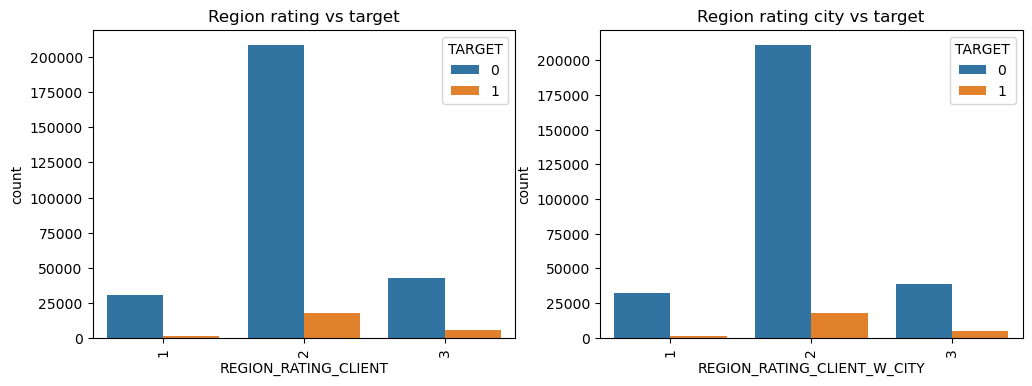

In [444]:
plt.figure(figsize=[12,4])
plt.subplot(121)
sns.countplot(data=ApplData,x='REGION_RATING_CLIENT',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Region rating vs target')
plt.subplot(122)
sns.countplot(data=ApplData,x='REGION_RATING_CLIENT_W_CITY',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Region rating city vs target')
plt.show()

In [445]:
res=ApplData.groupby(['REG_REGION_NOT_LIVE_REGION'])['TARGET'].value_counts()
Per_res=res.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_res

REG_REGION_NOT_LIVE_REGION  TARGET
0                           0         91.945954
                            1          8.054046
1                           0         90.702169
                            1          9.297831
Name: TARGET, dtype: float64

In [446]:
res1=ApplData.groupby(['REG_CITY_NOT_LIVE_CITY'])['TARGET'].value_counts()
Per_res1=res1.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_res1

REG_CITY_NOT_LIVE_CITY  TARGET
0                       0         92.279308
                        1          7.720692
1                       0         87.774034
                        1         12.225966
Name: TARGET, dtype: float64

In [447]:
res2=ApplData.groupby(['REG_CITY_NOT_WORK_CITY'])['TARGET'].value_counts()
Per_res2=res2.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_res2

REG_CITY_NOT_WORK_CITY  TARGET
0                       0         92.687328
                        1          7.312672
1                       0         89.388573
                        1         10.611427
Name: TARGET, dtype: float64

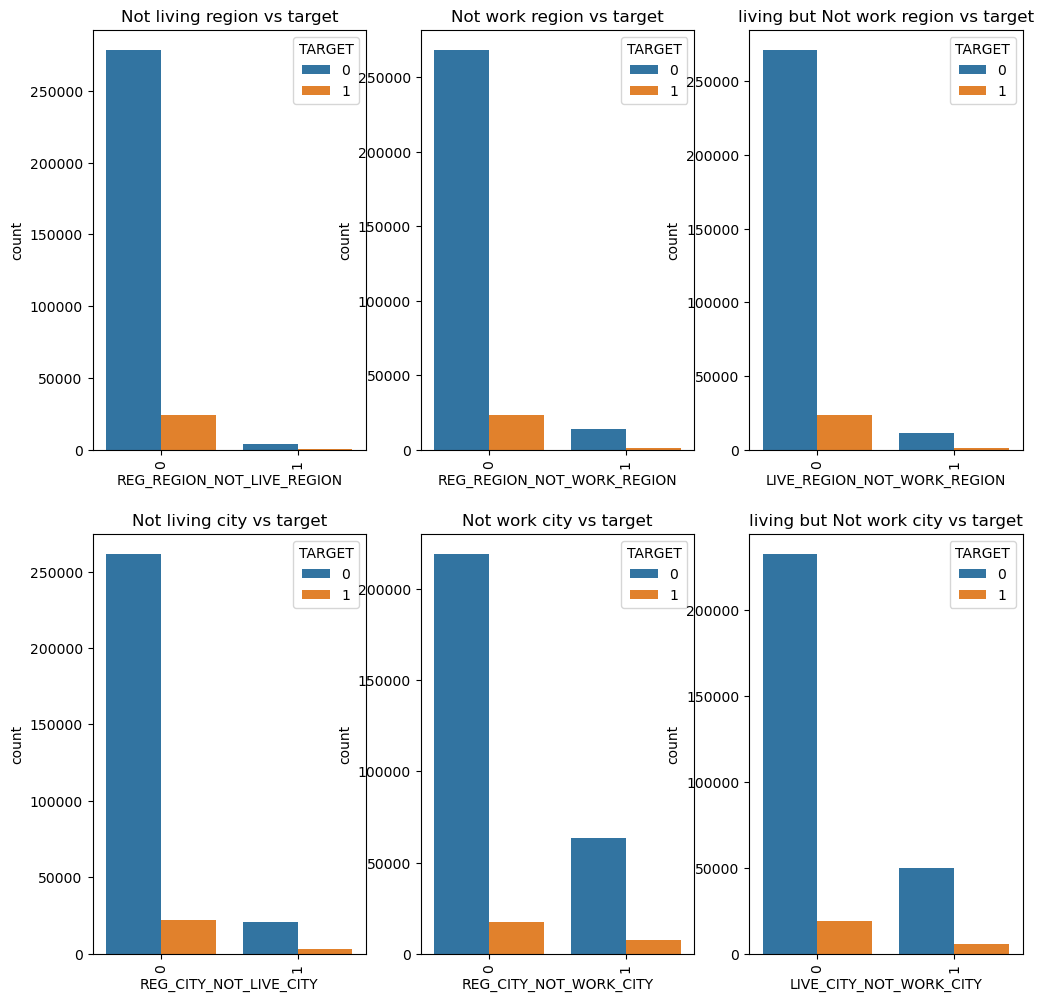

In [448]:
plt.figure(figsize=[12,12])
plt.subplot(231)
sns.countplot(data=ApplData,x='REG_REGION_NOT_LIVE_REGION',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Not living region vs target')
plt.subplot(232)
sns.countplot(data=ApplData,x='REG_REGION_NOT_WORK_REGION',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Not work region vs target')
plt.subplot(233)
sns.countplot(data=ApplData,x='LIVE_REGION_NOT_WORK_REGION',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('living but Not work region vs target')
plt.subplot(234)
sns.countplot(data=ApplData,x='REG_CITY_NOT_LIVE_CITY',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Not living city vs target')
plt.subplot(235)
sns.countplot(data=ApplData,x='REG_CITY_NOT_WORK_CITY',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('Not work city vs target')
plt.subplot(236)
sns.countplot(data=ApplData,x='LIVE_CITY_NOT_WORK_CITY',hue='TARGET')
plt.xticks(rotation = 90)
plt.title('living but Not work city vs target')
plt.show()

In [449]:
MergedDataset=pd.merge(left=ApplData,right=PrevApplData, how='left',left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [450]:
MergedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 90 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1430155 non-null  int64   
 1   TARGET                        1430155 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1430155 non-null  object  
 3   CODE_GENDER                   1430155 non-null  object  
 4   FLAG_OWN_CAR                  1430155 non-null  object  
 5   FLAG_OWN_REALTY               1430155 non-null  object  
 6   CNT_CHILDREN                  1430155 non-null  int64   
 7   AMT_INCOME_TOTAL              1430155 non-null  float64 
 8   AMT_CREDIT_x                  1430155 non-null  float64 
 9   AMT_ANNUITY_x                 1430062 non-null  float64 
 10  AMT_GOODS_PRICE_x             1428936 non-null  float64 
 11  NAME_TYPE_SUITE               1430155 non-null  object  
 12  NAME_INCOME_TY

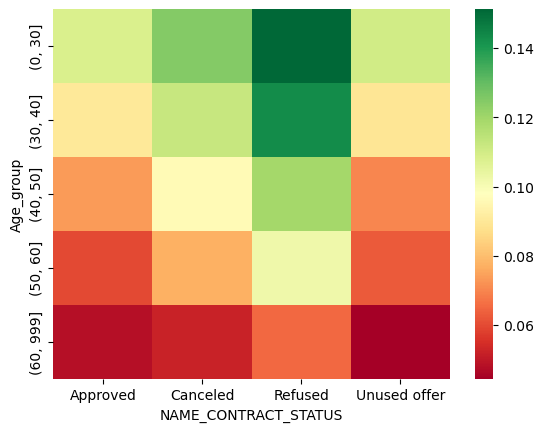

In [451]:
res= pd.pivot_table(MergedDataset, index="Age_group", columns="NAME_CONTRACT_STATUS", values="TARGET")
sns.heatmap(res, cmap="RdYlGn")
plt.show()

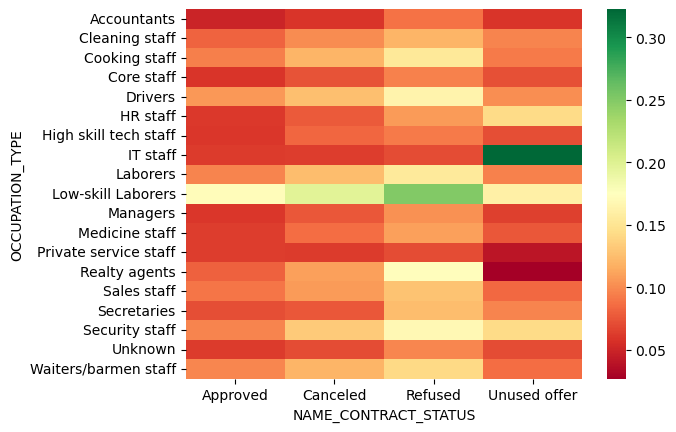

In [452]:
res= pd.pivot_table(MergedDataset, index="OCCUPATION_TYPE", columns="NAME_CONTRACT_STATUS", values="TARGET")
sns.heatmap(res, cmap="RdYlGn")
plt.show()

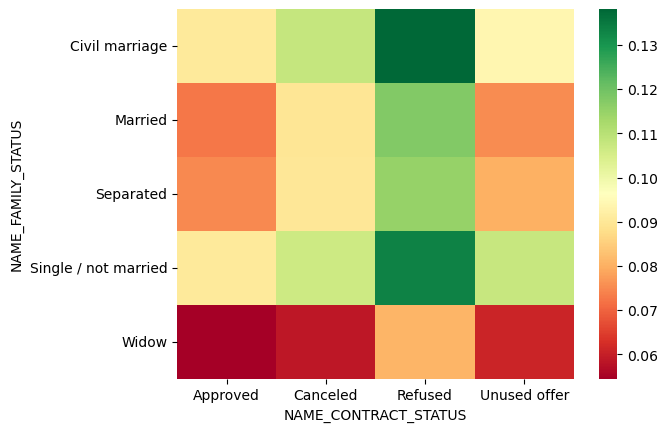

In [453]:
res= pd.pivot_table(MergedDataset, index="NAME_FAMILY_STATUS", columns="NAME_CONTRACT_STATUS", values="TARGET")
sns.heatmap(res, cmap="RdYlGn")
plt.show()

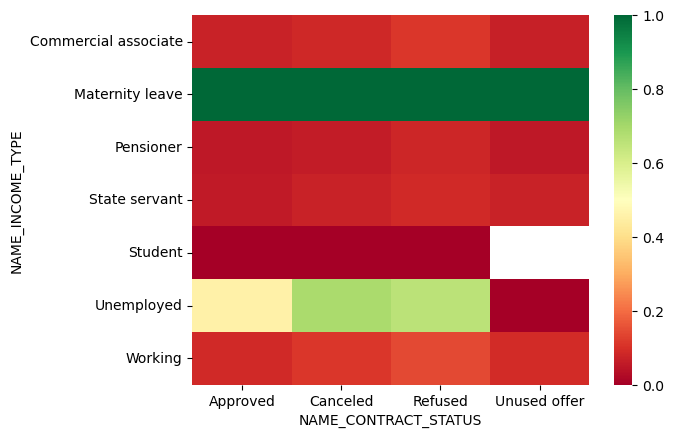

In [454]:
res= pd.pivot_table(MergedDataset, index="NAME_INCOME_TYPE", columns="NAME_CONTRACT_STATUS", values="TARGET")
sns.heatmap(res, cmap="RdYlGn")
plt.show()

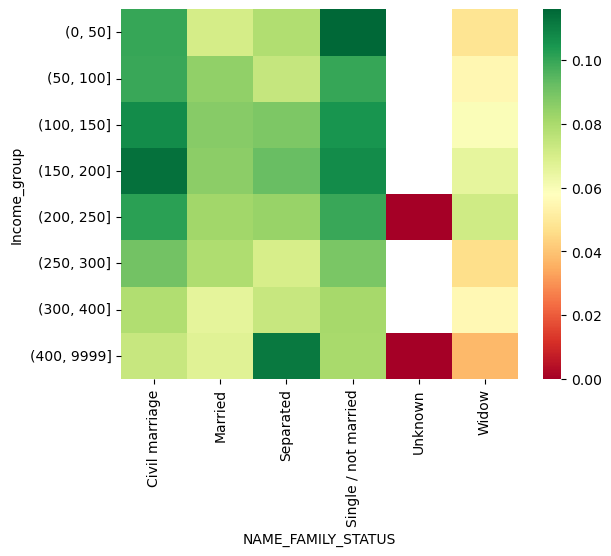

In [455]:
res= pd.pivot_table(MergedDataset, index="Income_group", columns="NAME_FAMILY_STATUS", values="TARGET")
sns.heatmap(res, cmap="RdYlGn")
plt.show()

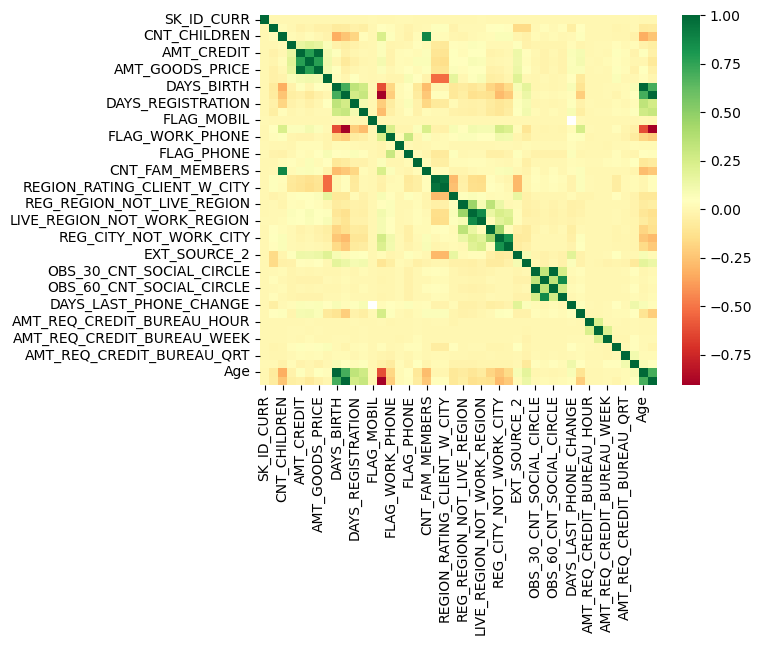

In [456]:
sns.heatmap(ApplData.corr(), cmap="RdYlGn")
plt.show()

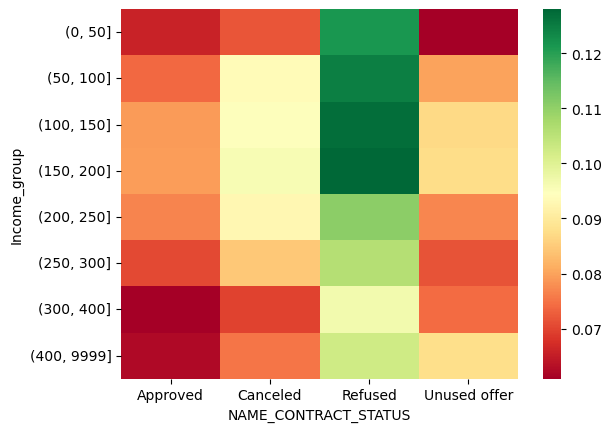

In [457]:
res= pd.pivot_table(MergedDataset, index="Income_group", columns="NAME_CONTRACT_STATUS", values="TARGET")
sns.heatmap(res, cmap="RdYlGn")
plt.show()

In [458]:
contract=MergedDataset.groupby(['NAME_CONTRACT_STATUS'])['TARGET'].value_counts()
Per_contract=contract.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
Per_contract

NAME_CONTRACT_STATUS  TARGET
Approved              0         92.411345
                      1          7.588655
Canceled              0         90.826431
                      1          9.173569
Refused               0         88.003586
                      1         11.996414
Unused offer          0         91.748276
                      1          8.251724
Name: TARGET, dtype: float64